In [2]:
!pip install cv2

ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


1 read file

Image path: /Users/sakura/Documents/書類 - /LiveInJapan(2019/2025/0工作/ABIST/git源代码/Gasyori100knock-ying/Question_01_10/imori.jpg


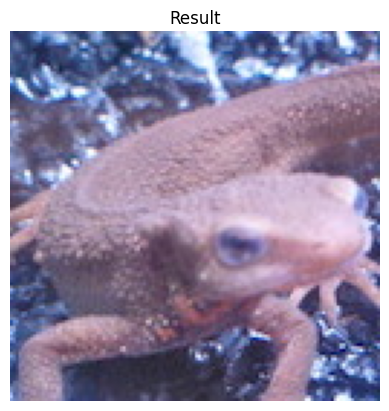

In [3]:
import os
import cv2
from matplotlib import pyplot as plt


proj_path = os.getcwd()
img_path = os.path.join(proj_path, "imori.jpg")

print("Image path:", img_path)  # 检查路径
img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)

# 兼容三/四通道
if img.ndim == 3 and img.shape[2] == 3:
    img_show = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
elif img.ndim == 3 and img.shape[2] == 4:
    img_show = cv2.cvtColor(img, cv2.COLOR_BGRA2RGBA)
else:
    img_show = img  # 灰度
    
# 用 matplotlib 显示
# 因为 OpenCV 默认读入的通道顺序是 BGR，而你用 matplotlib.pyplot.imshow() 显示时，它会按 RGB 去解释每个通道。
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Result")
plt.axis("off")  # 不显示坐标轴
plt.show()

question 1 change rbg to bgr

Round-trip back to original: True


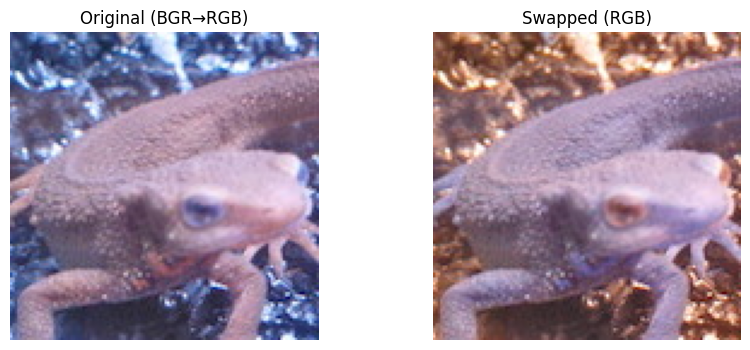

In [4]:
# import cv2
# import matplotlib.pyplot as plt

# def RGB2BGR(img):
#     r = img[:, :, 0].copy()
#     g = img[:, :, 1].copy()
#     b = img[:, :, 2].copy()
#     img[:, :, 0] = b
#     img[:, :, 1] = g
#     img[:, :, 2] = r
#     return img

# if __name__ == "__main__":
#     img_path = "imori.jpg"
#     img = cv2.imread(img_path)  # BGR
#     img2 = RGB2BGR(img.copy())  # 手动交换 → 得到“RGB版本”

#     plt.figure(figsize=(10, 4))

#     # 左边：原始（BGR → RGB，才能正确显示）
#     plt.subplot(1, 2, 1)
#     plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#     plt.title("Original (BGR)")
#     plt.axis("off")

#     # 右边：转换后（RGB，不需要再cv2.cvtColor）
#     plt.subplot(1, 2, 2)
#     plt.imshow(img)
#     plt.title("Converted (RGB2BGR)")
#     plt.axis("off")

#     plt.show()
import cv2
import numpy as np
import matplotlib.pyplot as plt

def swap_rb(img):
    """无副作用地交换 R 和 B；3通道或4通道都支持。"""
    if img.ndim != 3:
        return img.copy()
    if img.shape[2] == 3:
        return img[..., [2, 1, 0]].copy()      # BGR <-> RGB
    elif img.shape[2] == 4:
        return img[..., [2, 1, 0, 3]].copy()   # BGRA <-> RGBA
    else:
        return img.copy()

# 1) 读入：OpenCV 默认 BGR
img_bgr = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)

# 2) 交换一次：得到“RGB 等价图”
img_rgb = swap_rb(img_bgr)

# 3) 再交换一次：应当回到原始 BGR
img_bgr_roundtrip = swap_rb(img_rgb)

# 4) 自检：是否完全一致
print("Round-trip back to original:", np.array_equal(img_bgr, img_bgr_roundtrip))

# 5) 显示（关键：BGR 要先转成 RGB；RGB 直接显示）
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)); plt.title("Original (BGR→RGB)"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(img_bgr_roundtrip); plt.title("Swapped (RGB)"); plt.axis("off")
plt.show()

question 2 change rbg to gray

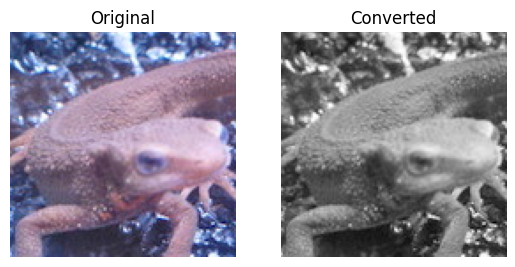

In [5]:
def RGB2GRAY(img):
    r = img[:, :, 0].copy()
    g = img[:, :, 1].copy()
    b = img[:, :, 2].copy()

    gray = 0.299 * r + 0.587 * g + 0.114 * b
    gray = gray.astype("uint8")
    return gray

if __name__ == "__main__":
    # Read image
    img = cv2.imread(img_path)

    # RGB -> GRAY
    img2 = RGB2GRAY(img.copy()) #cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # ---- 显示对比 ----
# 原图
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    plt.title("Original")
    plt.axis("off")                 
# 转换后图像
    plt.subplot(1, 2, 2)
    plt.imshow(img2, cmap="gray")
    plt.title("Converted")
    plt.axis("off")
    plt.show()
    

Q.3. 二値化

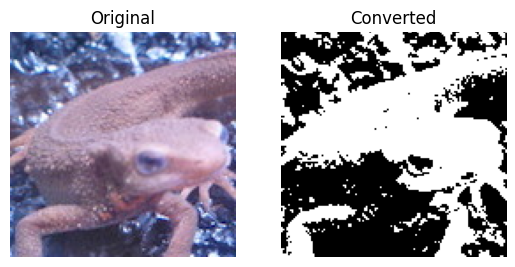

In [6]:
def RGB2binary(img, threshold=128):
    gray = RGB2GRAY(img)

    binary = gray.copy()
    binary[binary >= threshold] = 255
    binary[binary < threshold] = 0
    return binary
if __name__ == "__main__":
    # Read image
    img = cv2.imread(img_path)

    # RGB -> BINARY
    img2 = RGB2binary(img.copy(), threshold=128)

    # ---- 显示对比 ----
# 原图
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    plt.title("Original")
    plt.axis("off")
# 转换后图像
    plt.subplot(1, 2, 2)
    plt.imshow(img2, cmap="gray")
    plt.title("Converted")
    plt.axis("off")
    plt.show()



Q.4. 大津の二値化

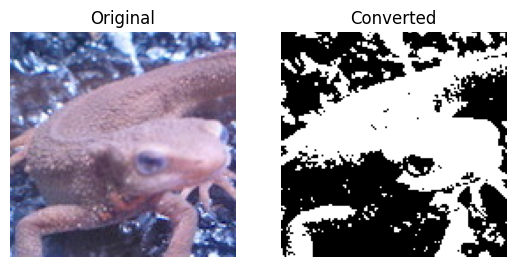

In [7]:
# import cv2
# import matplotlib.pyplot as plt
# img = cv2.imread('assets/imori.jpg')
# gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
# plt.hist(gray.ravel(), bins=255, rwidth=0.8, range=(0, 255))
# plt.xlabel('value')
# plt.ylabel('appearance')
# plt.show()
def RGB2otsuiBinary(img, threshold=128):
    gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
    otsui_binary = gray.copy()
    otsui_binary[otsui_binary >= threshold] = 255
    otsui_binary[otsui_binary < threshold] = 0
    return otsui_binary

if __name__ == "__main__":
    # Read image
    img = cv2.imread(img_path)

    # RGB -> Otsui BINARY
    img2 = RGB2otsuiBinary(img.copy(), threshold=128)

    # ---- 显示对比 ----
# 原图
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Original")
    plt.axis("off")
# 转换后图像
    plt.subplot(1, 2, 2)
    plt.imshow(img2, cmap="gray")
    plt.title("Converted")
    plt.axis("off")
    plt.show()
        

Q.5. HSV変換
Max = max(R,G,B)
Min = min(R,G,B)

H =  { 0                            (if Min=Max)
       60 x (G-R) / (Max-Min) + 60  (if Min=B)
       60 x (B-G) / (Max-Min) + 180 (if Min=R)
       60 x (R-B) / (Max-Min) + 300 (if Min=G)
       
V = Max

S = Max - Min
---------------------
C = S

H' = H / 60

X = C (1 - |H' mod 2 - 1|)

(R,G,B) = (V - C) (1,1,1) + { (0, 0, 0)  (if H is undefined)
                              (C, X, 0)  (if 0 <= H' < 1)
                              (X, C, 0)  (if 1 <= H' < 2)
                              (0, C, X)  (if 2 <= H' < 3)
                              (0, X, C)  (if 3 <= H' < 4)
                              (X, 0, C)  (if 4 <= H' < 5)
                              (C, 0, X)  (if 5 <= H' < 6)

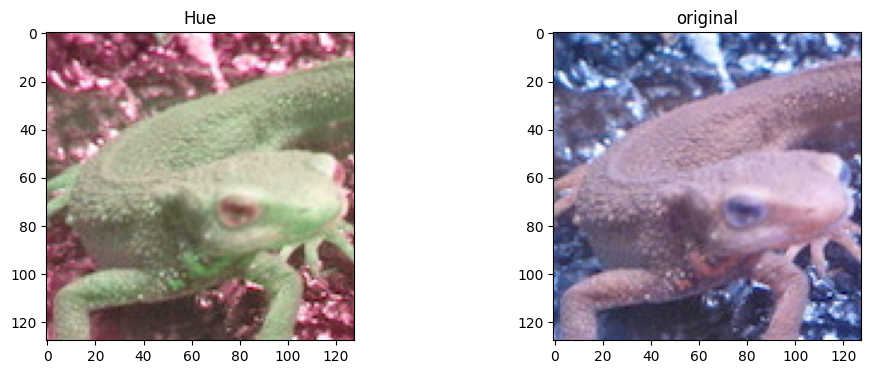

In [8]:
import numpy as np

def RGB2HSV(img):
    R = img[:, :, 0] / 255.0
    G = img[:, :, 1] / 255.0
    B = img[:, :, 2] / 255.0

    Max = np.maximum(np.maximum(R, G), B)
    Min = np.minimum(np.minimum(R, G), B)
    diff = Max - Min

    H = np.zeros_like(Max)

    # Hue
    mask = diff != 0
    mask_r = (Max == R) & mask
    mask_g = (Max == G) & mask
    mask_b = (Max == B) & mask

    H[mask_r] = (60 * ((G[mask_r] - B[mask_r]) / diff[mask_r]) + 0) % 360
    H[mask_g] = (60 * ((B[mask_g] - R[mask_g]) / diff[mask_g]) + 120) % 360
    H[mask_b] = (60 * ((R[mask_b] - G[mask_b]) / diff[mask_b]) + 240) % 360

    # Saturation
    S = np.zeros_like(Max)
    S[Max != 0] = diff[Max != 0] / Max[Max != 0]

    # Value
    V = Max

    hsv = np.dstack((H, S, V))
    return hsv

def HSV2RGB(hsv):
    H, S, V = hsv[...,0], hsv[...,1], hsv[...,2]
    C = S * V
    H_ = H / 60.0
    X = C * (1 - np.abs(H_ % 2 - 1))
    m = V - C

    rgb = np.zeros((*H.shape, 3), dtype=np.float32)
    Z = np.zeros_like(H, dtype=np.float32)

    conds = [
        (0 <= H_) & (H_ < 1),
        (1 <= H_) & (H_ < 2),
        (2 <= H_) & (H_ < 3),
        (3 <= H_) & (H_ < 4),
        (4 <= H_) & (H_ < 5),
        (5 <= H_) & (H_ < 6)
    ]
    colors = [
        (C, X, Z), (X, C, Z), (Z, C, X),
        (Z, X, C), (X, Z, C), (C, Z, X)
    ]

    for cond, (r, g, b) in zip(conds, colors):
        rgb[...,0][cond] = (r + m)[cond]
        rgb[...,1][cond] = (g + m)[cond]
        rgb[...,2][cond] = (b + m)[cond]

    rgb = np.clip(rgb * 255.0, 0, 255).astype(np.uint8)
    return rgb
if __name__ == "__main__":
    # Read image
    img = cv2.imread(img_path)

        # 1) 读入：OpenCV 默认 BGR
    img_bgr = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)

    # 2) 交换一次：得到“RGB 等价图”
    img_rgb = swap_rb(img_bgr)

    hsv = RGB2HSV(img_rgb.copy())

    hsv[...,0] =  (hsv[...,0] + 120) % 360
    # hsv[...,1] =  (hsv[...,1] + 120) % 360
    # S = hsv[..., 1]
    # V = hsv[..., 2]

    out = HSV2RGB(hsv.copy())


    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1); plt.imshow(out, cmap='hsv'); plt.title("Hue")
    plt.subplot(1,2,2); plt.imshow(img_rgb); plt.title("original")
    plt.show()

    # RGB -> HSV
#     img2 = RGB2HSV(img_rgb.copy()) #cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

#     # ---- 显示对比 ----
# # 原图
#     plt.subplot(1, 2, 1)
#     plt.imshow(img_rgb)
#     plt.title("Original")
#     plt.axis("off")
# # 转换后图像

#     plt.subplot(1, 2, 2)
#     plt.imshow(img2)
#     plt.title("Converted")
#     plt.axis("off")
#     plt.show()


Q.6. 減色処理

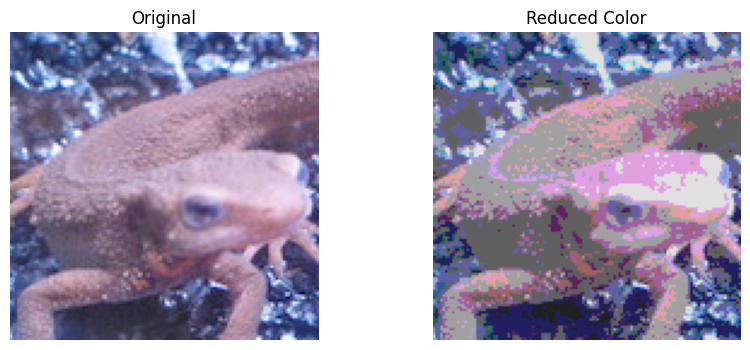

In [9]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def reduce_color(img):
    """将图像像素值量化为 {32, 96, 160, 224} 四档"""
    img = img.astype(np.uint8, copy=False)
    out = np.zeros_like(img, dtype=np.uint8)

    if img.ndim == 3:  # 彩色图像
        for i in range(3):
            channel = img[..., i]
            reduced = np.select(
                [
                    (channel < 64),
                    (channel >= 64) & (channel < 128),
                    (channel >= 128) & (channel < 192),
                    (channel >= 192),
                ],
                [np.uint8(32), np.uint8(96), np.uint8(160), np.uint8(224)],
                default=channel
            )
            out[..., i] = reduced.astype(np.uint8, copy=False)
    else:  # 灰度图
        out = np.select(
            [
                (img < 64),
                (img >= 64) & (img < 128),
                (img >= 128) & (img < 192),
                (img >= 192),
            ],
            [np.uint8(32), np.uint8(96), np.uint8(160), np.uint8(224)],
            default=img
        ).astype(np.uint8, copy=False)
    return out


# ========== 示例 ==========
if __name__ == "__main__":
    img_path = "imori.jpg"
    img_bgr = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Original")
    plt.axis("off")

    out = reduce_color(img_rgb.copy())
    plt.subplot(1, 2, 2)
    plt.imshow(out)
    plt.title("Reduced Color")
    plt.axis("off")
    plt.show()

Q7平均プーリング
v = 1/|R| * Sum_{i in R} v_i
ここではimori.jpgは128x128なので、8x8にグリッド分割し、平均プーリングせよ。

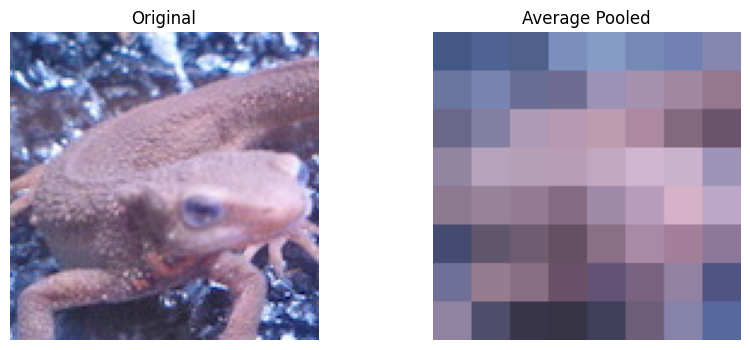

In [ ]:
def average_pool_image(arr: np.ndarray, n_rows: int = 8, n_cols: int = 8) -> np.ndarray:
    """将图像按 n_rows×n_cols 网格做平均池化，支持 RGB/灰度。"""
    if arr.ndim == 2:  # 灰度 -> 增加通道轴
        arr = arr[..., None]
    H, W, C = arr.shape
    out = arr.astype(np.float32).copy()
    cell_h, cell_w = H // n_rows, W // n_cols

    for r in range(n_rows):
        y0 = r * cell_h
        y1 = (r + 1) * cell_h if r < n_rows - 1 else H
        for c in range(n_cols):
            x0 = c * cell_w
            x1 = (c + 1) * cell_w if c < n_cols - 1 else W
            blk = out[y0:y1, x0:x1, :]
            mean = blk.mean(axis=(0, 1), keepdims=True)
            out[y0:y1, x0:x1, :] = mean

    out = np.clip(out, 0, 255).astype(np.uint8)
    return out[..., 0] if out.shape[2] == 1 else out

if __name__ == "__main__":
    img_path = "imori.jpg"
    img_bgr = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Original")
    plt.axis("off")

    out = average_pool_image(img_rgb.copy(), n_rows=8, n_cols=8)
    plt.subplot(1, 2, 2)
    plt.imshow(out)
    plt.title("Average Pooled")
    plt.axis("off")
    plt.show()

Q8 Max Pooling

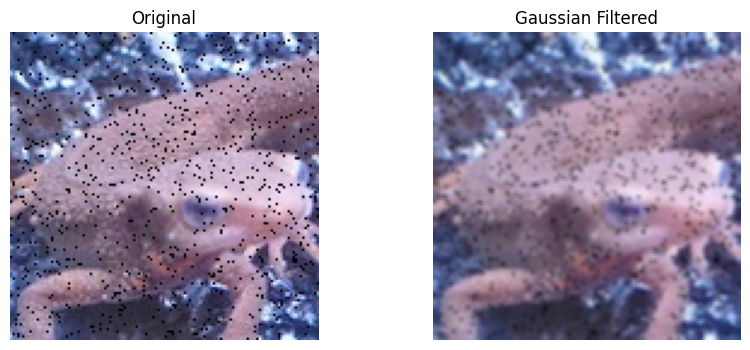

In [ ]:

def max_pool_image(arr, n_rows=8, n_cols=8, out_path=None):
    """
    对图像执行最大池化（Max Pooling）
    n_rows × n_cols 表示网格划分数
    """
    if arr.ndim == 2:  # 灰度 -> 增加通道轴
        arr = arr[..., None]
    H, W, C = arr.shape
    out = np.zeros_like(arr)
    cell_h, cell_w = H // n_rows, W // n_cols

    for r in range(n_rows):
        for c in range(n_cols):
            y0, y1 = r * cell_h, (r + 1) * cell_h if r < n_rows - 1 else H
            x0, x1 = c * cell_w, (c + 1) * cell_w if c < n_cols - 1 else W
            block = arr[y0:y1, x0:x1, :]
            val = block.max(axis=(0, 1))
            out[y0:y1, x0:x1, :] = val

    out = np.clip(out, 0, 255).astype(np.uint8)
    return out

if __name__ == "__main__":
    img_path = "imori.jpg"
    img_bgr = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Original")
    plt.axis("off")

    out = max_pool_image(img_rgb.copy(), n_rows=8, n_cols=8)
    plt.subplot(1, 2, 2)
    plt.imshow(out)
    plt.title("Max Pooled")
    plt.axis("off")
    plt.show()
    

Q.9. ガウシアンフィルタ
重み g(x,y,s) = 1/ (2 * pi * sigma * sigma) * exp( - (x^2 + y^2) / (2*s^2))
標準偏差s = 1.3による8近傍ガウシアンフィルタは
            1 2 1
K =  1/16 [ 2 4 2 ]
            1 2 1

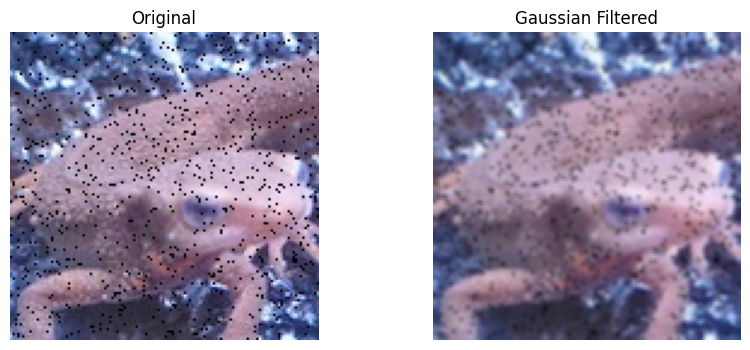

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gaussian_filter(img, sigma=1.3):
    """
    对图像执行 3×3 高斯滤波，sigma=1.3
    """
    K = np.array([[1, 2, 1],
                  [2, 4, 2],
                  [1, 2, 1]], dtype=np.float32)
    K /= 16.0  # 归一化
    out = cv2.filter2D(img, -1, K)
    return out


if __name__ == "__main__":
    img_path = "imori_noise.jpg"
    img_bgr = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Original")
    plt.axis("off")

    out = gaussian_filter(img_rgb.copy())  # 改成直接返回图像
    plt.subplot(1, 2, 2)
    plt.imshow(out)
    plt.title("Gaussian Filtered")
    plt.axis("off")

    plt.show()

Q.10 メディアンフィルタ

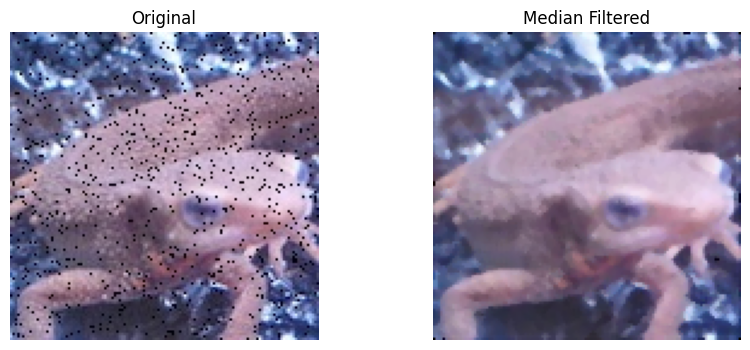

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def median_filter(img):
    """
    对图像执行 3×3 中值滤波（含零填充）
    """
    H, W, C = img.shape
    pad = 1
    out = np.zeros_like(img)
    # 零填充
    padded = np.pad(img, ((pad, pad), (pad, pad), (0, 0)), 'constant', constant_values=0)

    # 逐像素中值处理
    for y in range(H):
        for x in range(W):
            for c in range(C):
                region = padded[y:y+3, x:x+3, c].flatten()
                out[y, x, c] = np.median(region)

    return out

if __name__ == "__main__":
    img_path = "imori_noise.jpg"
    img_bgr = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Original")
    plt.axis("off")

    out = median_filter(img_rgb)
    plt.subplot(1, 2, 2)
    plt.imshow(out)
    plt.title("Median Filtered")
    plt.axis("off")

    plt.show()

Q.11. 平滑化フィルタ

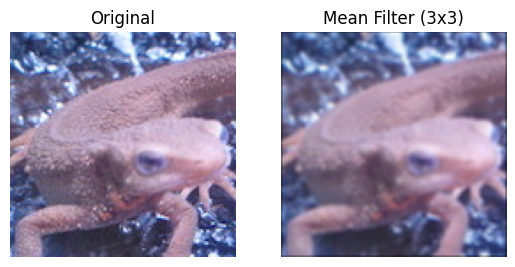

In [1]:
import cv2
import numpy as np

def mean_filter(img):
    """3x3 平滑化フィルタ（平均フィルタ）"""
    H, W, C = img.shape
    out = np.zeros((H, W, C), dtype=np.float32)

    # 零填充（ゼロパディング）
    pad = 1
    img_pad = np.pad(img, ((pad, pad), (pad, pad), (0, 0)), mode='constant')

    # 平滑化滤波（3×3平均）
    for y in range(H):
        for x in range(W):
            for c in range(C):
                out[y, x, c] = np.mean(img_pad[y:y+3, x:x+3, c])

    out = np.clip(out, 0, 255)
    return out.astype(np.uint8)

if __name__ == "__main__":
    img = cv2.imread("Question_11_20/imori.jpg")
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    out = mean_filter(img_rgb)

    import matplotlib.pyplot as plt
    plt.subplot(1,2,1); plt.imshow(img_rgb); plt.title("Original"); plt.axis("off")
    plt.subplot(1,2,2); plt.imshow(out); plt.title("Mean Filter (3x3)"); plt.axis("off")
    plt.show()

Q.12. モーションフィルタ

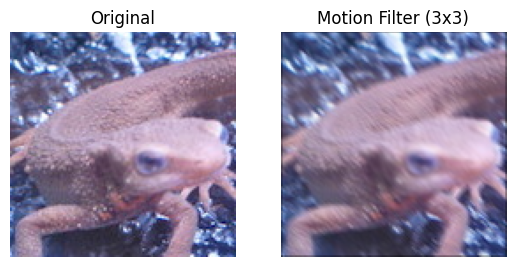

In [2]:
def motion_filter(img):
    """モーションフィルタ(3x3) — 对角方向平均滤波"""
    H, W, C = img.shape
    out = np.zeros((H, W, C), dtype=np.float32)

    # 零填充（ゼロパディング）
    pad = 1
    img_pad = np.pad(img, ((pad, pad), (pad, pad), (0, 0)), mode='constant')

    # フィルタ（3x3対角成分のみ1/3）
    K = np.array([[1/3, 0,   0],
                  [0,   1/3, 0],
                  [0,   0,   1/3]], dtype=np.float32)

    # フィルタリング
    for y in range(H):
        for x in range(W):
            for c in range(C):
                region = img_pad[y:y+3, x:x+3, c]
                out[y, x, c] = np.sum(region * K)

    out = np.clip(out, 0, 255)
    return out.astype(np.uint8)


if __name__ == "__main__":
    img = cv2.imread("Question_11_20/imori.jpg")
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    out = motion_filter(img_rgb)

    import matplotlib.pyplot as plt
    plt.subplot(1,2,1); plt.imshow(img_rgb); plt.title("Original"); plt.axis("off")
    plt.subplot(1,2,2); plt.imshow(out); plt.title("Motion Filter (3x3)"); plt.axis("off")
    plt.show()

Q.13. MAX-MINフィルタ

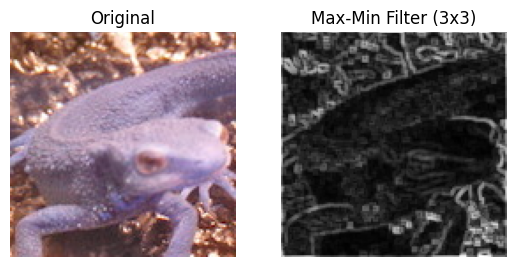

In [7]:
import cv2
import numpy as np

def max_min_filter(img_gray):
    """MAX-MINフィルタ(3x3) — 画素の最大値と最小値の差を出力"""
    H, W = img_gray.shape
    out = np.zeros((H, W), dtype=np.float32)

    # ゼロパディング
    pad = 1
    img_pad = np.pad(img_gray, ((pad, pad), (pad, pad)), mode='constant')

    # フィルタ処理
    for y in range(H):
        for x in range(W):
            region = img_pad[y:y+3, x:x+3]
            out[y, x] = np.max(region) - np.min(region)

    out = np.clip(out, 0, 255)
    return out.astype(np.uint8)

if __name__ == "__main__":
    img = cv2.imread("Question_11_20/imori.jpg")
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


    out = max_min_filter(img_gray)

    import matplotlib.pyplot as plt
    plt.subplot(1,2,1); plt.imshow(img, cmap='gray'); plt.title("Original"); plt.axis("off")
    plt.subplot(1,2,2); plt.imshow(out, cmap='gray'); plt.title("Max-Min Filter (3x3)"); plt.axis("off")
    plt.show()

Q.14. 微分フィルタ

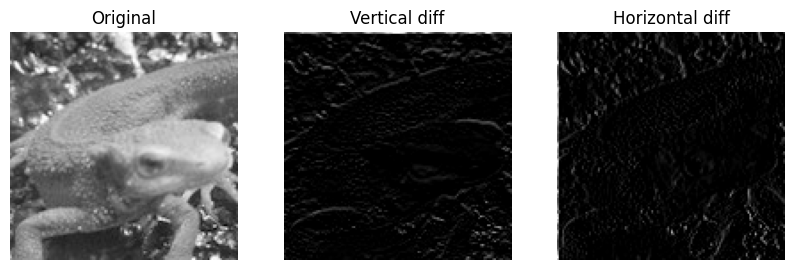

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def differential_filter(img_gray, direction='vertical'):
    """微分フィルタ(3x3)
       direction: 'vertical' または 'horizontal'
    """
    H, W = img_gray.shape
    out = np.zeros((H, W), dtype=np.float32)

    pad = 1
    img_pad = np.pad(img_gray, ((pad, pad), (pad, pad)), mode='constant')

    if direction == 'vertical':
        # (a) 縦方向
        K = np.array([[0, -1, 0],
                      [0,  1, 0],
                      [0,  0, 0]], dtype=np.float32)
    elif direction == 'horizontal':
        # (b) 横方向
        K = np.array([[0, 0, 0],
                      [-1, 1, 0],
                      [0, 0, 0]], dtype=np.float32)
    else:
        raise ValueError("direction must be 'vertical' or 'horizontal'")

    # フィルタリング
    for y in range(H):
        for x in range(W):
            region = img_pad[y:y+3, x:x+3]
            out[y, x] = np.sum(region * K)

    out = np.clip(out, 0, 255)
    return out.astype(np.uint8)

if __name__ == "__main__":
    img = cv2.imread("Question_11_20/imori.jpg", cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError("画像が見つかりません。パスを確認してください。")

    out_v = differential_filter(img, direction='vertical')
    out_h = differential_filter(img, direction='horizontal')

    plt.figure(figsize=(10,4))
    plt.subplot(1,3,1); plt.imshow(img, cmap='gray'); plt.title("Original"); plt.axis("off")
    plt.subplot(1,3,2); plt.imshow(out_v, cmap='gray'); plt.title("Vertical diff"); plt.axis("off")
    plt.subplot(1,3,3); plt.imshow(out_h, cmap='gray'); plt.title("Horizontal diff"); plt.axis("off")
    plt.show()

Q.17. Laplacianフィルタ

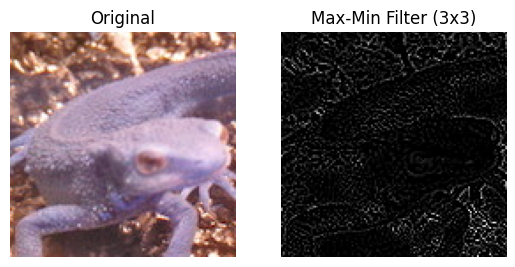

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def laplacian4_numpy(img: np.ndarray) -> np.ndarray:
    """
    4-neighborhood Laplacian:
        [ [0, 1, 0],
          [1,-4, 1],
          [0, 1, 0] ]
    入力: 2D (H,W) グレースケール or 3D (H,W,3) カラー
    戻り: 同サイズ、uint8
    """
    def _lap2d(gray):
        g = gray.astype(np.float32)
        # 反射パディング
        p = np.pad(g, ((1,1),(1,1)), mode='reflect')
        # 中心と4近傍をシフトで足し合わせ
        out = (
            p[1:-1,0:-2] +   # 左
            p[0:-2,1:-1] +   # 上
           -4*p[1:-1,1:-1] + # 中心
            p[2:  ,1:-1] +   # 下
            p[1:-1,2:  ]     # 右
        )
        # 結果を0-255に収める（可視化用）
        out = np.clip(out, 0, 255).astype(np.uint8)
        return out

    if img.ndim == 2:
        return _lap2d(img)
    elif img.ndim == 3 and img.shape[2] in (3,4):
        ch = [ _lap2d(img[...,c]) for c in range(img.shape[2]) ]
        return np.stack(ch, axis=-1)
    else:
        raise ValueError("img must be (H,W) or (H,W,C)")
    

if __name__ == "__main__":
    img = cv2.imread("Question_11_20/imori.jpg")
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


    out = laplacian4_numpy(img_gray)

    import matplotlib.pyplot as plt
    plt.subplot(1,2,1); plt.imshow(img, cmap='gray'); plt.title("Original"); plt.axis("off")
    plt.subplot(1,2,2); plt.imshow(out, cmap='gray'); plt.title("laplacian"); plt.axis("off")
    plt.show() 

Q.18. Embossフィルタ

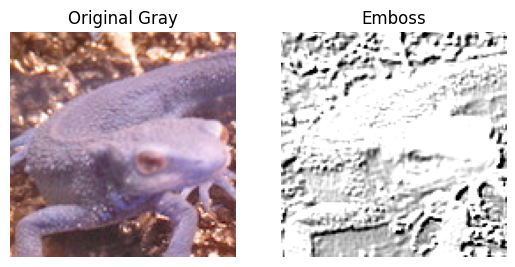

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def emboss_numpy(img, offset=128.0, scale=1.0):
    """
    Embossフィルタ（課題カーネル）
    - 入力: (H,W) uint8 グレースケール想定
    - 出力: (H,W) uint8
    """
    # ここが重要：float32に変換
    g = img.astype(np.float32)

    # 反射パディング
    p = np.pad(g, ((1,1),(1,1)), mode='reflect')

    # カーネル適用（課題どおり）
    out = (
        -2*p[0:-2,0:-2] + -1*p[0:-2,1:-1] + 0*p[0:-2,2:] +
        -1*p[1:-1,0:-2] +  1*p[1:-1,1:-1] + 1*p[1:-1,2:] +
         0*p[2:  ,0:-2] +  1*p[2:  ,1:-1] + 2*p[2:  ,2:]
    )

    # スケールしてオフセット（エンボスの見栄え用）
    out = scale * out + offset
    # 表示用に0-255へクリップしてuint8へ
    out = np.clip(out, 0, 255).astype(np.uint8)
    return out

if __name__ == "__main__":
    img = cv2.imread("Question_11_20/imori.jpg")
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    out = emboss_numpy(img_gray, offset=128, scale=1.0)

    plt.subplot(1,2,1); plt.imshow(img, cmap='gray'); plt.title("Original Gray"); plt.axis("off")
    plt.subplot(1,2,2); plt.imshow(out, cmap='gray'); plt.title("Emboss"); plt.axis("off")
    plt.show()

Q.19. LoGフィルタ

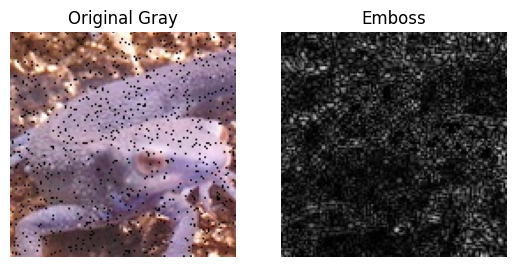

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# ---- Gray scale (BT.709) ----
def BGR2GRAY(img):
    b, g, r = img[...,0], img[...,1], img[...,2]
    out = 0.2126*r + 0.7152*g + 0.0722*b
    return out.astype(np.uint8)

# ---- LoG kernel ----
def LoG_kernel(K_size=5, sigma=3.0):
    pad = K_size // 2
    yy, xx = np.mgrid[-pad:pad+1, -pad:pad+1]
    # LoG formula
    norm = (xx**2 + yy**2 - sigma**2) / (2 * np.pi * (sigma**6))
    g = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    K = norm * g
    # 零均值化（輝度オフセットを防ぐ）
    K = K - K.mean()
    return K.astype(np.float32)

# ---- LoG filtering ----
def LoG_filter(gray, K_size=5, sigma=3.0, mode="abs", zc_thresh=0.0):
    """
    gray: uint8 (H,W)
    mode: "abs"  -> |LoG| を0-255へ正規化（可視化向け）
          "zc"   -> zero-crossingで二値エッジを出力
    zc_thresh: 零交差時のマグニチュード下限（ノイズ抑制）
    """
    if gray.ndim != 2:
        raise ValueError("LoG_filter expects a grayscale image (H,W).")

    K = LoG_kernel(K_size, sigma)
    # 卷积（反射边界更自然）
    resp = cv2.filter2D(gray.astype(np.float32), ddepth=cv2.CV_32F,
                        kernel=K, borderType=cv2.BORDER_REFLECT)

    if mode == "abs":
        # 绝对值 + 归一化到 0-255（可视化）
        resp_abs = np.abs(resp)
        out = cv2.normalize(resp_abs, None, 0, 255, cv2.NORM_MINMAX)
        return out.astype(np.uint8)

    elif mode == "zc":
        # 零交差：检测符号变化且幅度超过阈值
        sign = np.sign(resp)
        # 8邻域与中心符号相乘 < 0 表示有零交差
        zc = np.zeros_like(resp, dtype=np.uint8)
        for dy in (-1, 0, 1):
            for dx in (-1, 0, 1):
                if dx == 0 and dy == 0: 
                    continue
                prod = sign * np.roll(np.roll(sign, dy, axis=0), dx, axis=1)
                cross = (prod < 0)
                if zc_thresh > 0:
                    mag = np.maximum(np.abs(resp),
                                     np.abs(np.roll(np.roll(resp, dy, 0), dx, 1)))
                    cross &= (mag > zc_thresh)
                zc |= cross.astype(np.uint8)
        return (zc * 255).astype(np.uint8)

    else:
        raise ValueError("mode must be 'abs' or 'zc'")

if __name__ == "__main__":
    img = cv2.imread("Question_11_20/imori_noise.jpg")
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    out = LoG_filter(img_gray)

    plt.subplot(1,2,1); plt.imshow(img, cmap='gray'); plt.title("Original Gray"); plt.axis("off")
    plt.subplot(1,2,2); plt.imshow(out, cmap='gray'); plt.title("Log"); plt.axis("off")
    plt.show()

Q.20. ヒストグラム表示

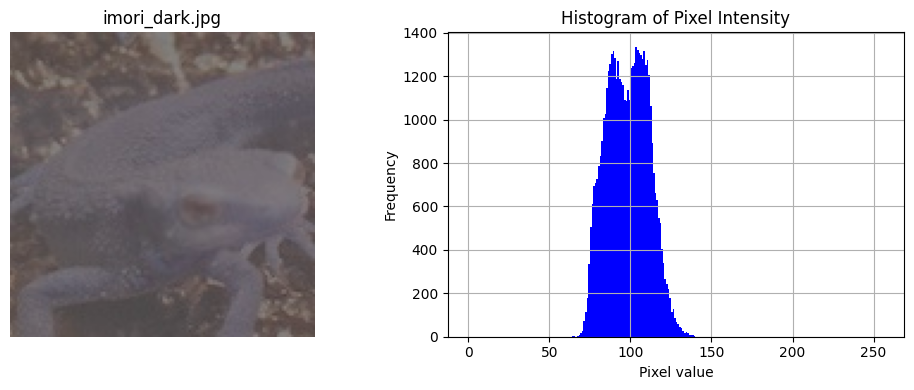

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 画像を読み込む（BGR形式）
img = cv2.imread("Question_11_20/imori_dark.jpg")

# グレースケール化（ヒストグラムをわかりやすくする）
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# ヒストグラムを計算
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

# Matplotlibで表示
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("imori_dark.jpg")
plt.axis("off")

plt.subplot(1,2,2)
plt.hist(img.ravel(), bins=256, range=(0,256), color='blue')
plt.title("Histogram of Pixel Intensity")
plt.xlabel("Pixel value")
plt.ylabel("Frequency")
plt.grid(True)

plt.tight_layout()
plt.show()